<a href="https://colab.research.google.com/github/gabrielfas/Spotify-Playlist-Analysis/blob/master/colab-notebooks/diversifytests.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Obtendo arquivos do Google Drive

In [ ]:
!pip install -U -q PyDrive

In [ ]:
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

## Fazendo login no Google Cloud Platform

> O login é necessário para obter alguns arquivos que serão utilizados no decorrer do notebook.
Os arquivos estão disponíveis nessa pasta do Google Drive: [diversify-files](https://drive.google.com/drive/folders/1RNg99x6G_Mmh1smc3SrRz-Qk3PCj8Cys)<br/>
Eles serão baixados automaticamente na máquina virtual do google colaborative no código abaixo.



In [ ]:
# 1. Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [ ]:
folder_id = '1RNg99x6G_Mmh1smc3SrRz-Qk3PCj8Cys'
folder = drive.ListFile({'q': "'{}' in parents and trashed=false".format(folder_id)})

file_list = folder.GetList()

for file in file_list:
    file.GetContentFile(file['title'])
    

## Instalando dependências

> Esse passo pode ser um pouco demorado devido à máquina virtual da google ser iniciada sem nenhum dos pacotes de visualização.

In [5]:
!pip install -r requirements.txt

    100% |████████████████████████████████| 14.7MB 1.4MB/s 
    100% |████████████████████████████████| 12.6MB 1.8MB/s 
    100% |████████████████████████████████| 14.7MB 2.0MB/s 
    100% |████████████████████████████████| 8.9MB 3.0MB/s 
    100% |████████████████████████████████| 204kB 21.8MB/s 
    100% |████████████████████████████████| 7.4MB 3.3MB/s 
    100% |████████████████████████████████| 952kB 14.2MB/s 
  Running setup.py bdist_wheel for bokeh ... done
  Stored in directory: /root/.cache/pip/wheels/ff/28/51/22e8d08e9d5383ee1de981aaa8ff7bc53c7d65022e5101400f
  Running setup.py bdist_wheel for seaborn ... done
  Stored in directory: /root/.cache/pip/wheels/fc/1c/74/c8f80a532c06a789599b8659b117ec7d7574cac4a06f7dabfe
  Running setup.py bdist_wheel for spotipy ... done
  Stored in directory: /root/.cache/pip/wheels/76/28/19/a86ca9bb0e32dbd4a4f580870250f5aeef852870578e0427e6
Successfully built bokeh seaborn spotipy
opencv-python 3.4.3.18 has requirement numpy>=1.11.1, but you'll h

# Pacotes utilizados

In [ ]:
import pandas as pd
import interfacespfy as isp
import altair as alt
import seaborn as sns
import bokeh as bkh
import matplotlib.pyplot as plt

In [8]:
import warnings
warnings.filterwarnings('ignore')

# Altair plots render by default in JupyterLab and nteract

# Uncomment/run this line to enable Altair in the classic notebook (not in JupyterLab)
# alt.renderers.enable('notebook')

# Uncomment/run this line to enable Altair in Colab
alt.renderers.enable('colab')

RendererRegistry.enable('colab')

## Fazendo login no spotify e baixando musicas salvas

In [9]:
spfy = isp.login_user('belzedu')
musics = isp.get_favorite_songs(spfy)



            User authentication requires interaction with your
            web browser. Once you enter your credentials and
            give authorization, you will be redirected to
            a url.  Paste that url you were directed to to
            complete the authorization.

        
Opened https://accounts.spotify.com/authorize?scope=playlist-modify-private+user-library-read&redirect_uri=http%3A%2F%2Flocalhost%2F&response_type=code&client_id=5d6d117598a94245a84a726981fa6e3b in your browser


Enter the URL you were redirected to: http://localhost/?code=AQB0FkQs7xxEBwPhkfVUh82RRTTuGs33NQo9F47OmsWHdmmPbEKKgwlGlcNe-x_anXsvS3haB2yaNoLqdVXrG5Ox0NW6CqPgrFFhnr88jeMseeKyGQs6FPFpvTeb5Yd-4FjTPTU7GadoVJEJJhfbrVOysClnJW1a5FdiRRES1PQex2sUayTL7LZLGw7WlVle2-7rBbWyfoh1KAXg7dGbwff0uIwdJDvHIHeMnY1SoURNDOSyKw




In [10]:
pdmusics = pd.DataFrame(musics)
pdmusics.set_index(['id'], inplace=True)
print("Quantidade de musicas baixadas:", pdmusics.shape[0])
pdmusics.head()

('Quantidade de musicas baixadas:', 564)


,album,album_id,artist,artist_id,duration_ms,name,popularity
id,,,,,,,
08JTB5hpXPCVPGJzic8E9e,Beautiful People Will Ruin Your Life (Extended...,7CPPcbdyAhAF1PEWCnm4DY,The Wombats,0Ya43ZKWHTKkAbkoJJkwIB,214432,Bee-Sting,42
7v9Ne4758aGFfFc5avh89h,"Proudly Present....A Guide To Love, Loss & Des...",75l5Bqvc0BH45UhJrS04Xj,The Wombats,0Ya43ZKWHTKkAbkoJJkwIB,191293,Let's Dance To Joy Division,65
4w9TBRGhvbhiLQB8jVCusl,Beautiful People Will Ruin Your Life,4kUbTSoTsbKP5MRdYMDBx1,The Wombats,0Ya43ZKWHTKkAbkoJJkwIB,219481,Cheetah Tongue,63
11IJA30efHAJLO3qroPh5L,Beautiful People Will Ruin Your Life,4kUbTSoTsbKP5MRdYMDBx1,The Wombats,0Ya43ZKWHTKkAbkoJJkwIB,207679,Turn,64
7GvkOFkNsM6Exnkyqeajqm,"Proudly Present....A Guide To Love, Loss & Des...",75l5Bqvc0BH45UhJrS04Xj,The Wombats,0Ya43ZKWHTKkAbkoJJkwIB,210560,Moving To New York,64


In [ ]:
saved_songs_feat = isp.get_favorite_songs(spfy, features=True)
saved_songs_data = isp.get_favorite_songs(spfy)

## Descrição das colunas

- **acousticness**: Valor de 0 a 1 que indica se há som de audiência na música. Um valor de 1 indica maior certeza da presença de público na gravação e vice-versa.
- **danceability**: Valor de 0 a 1 que indica se a música é favorável para dançar de acordo com características musicais como setabilidade ritimica.
- Adicionar outras

In [12]:
df_ssongs = pd.DataFrame(saved_songs_feat)
print("Quantidade de musicas salvas:", df_ssongs.shape[0])
df_ssongs.set_index('id', inplace=True)
df_ssongs.head()

('Quantidade de musicas salvas:', 564)


,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,valence
id,,,,,,,,,,,
08JTB5hpXPCVPGJzic8E9e,0.045700,0.650,0.866,0.000000,11,0.0682,-3.713,1,0.0343,115.001,0.717
7v9Ne4758aGFfFc5avh89h,0.001250,0.397,0.839,0.000000,4,0.5760,-6.674,1,0.1020,116.947,0.764
4w9TBRGhvbhiLQB8jVCusl,0.042600,0.533,0.967,0.000432,2,0.1320,-3.066,1,0.0570,95.008,0.603
11IJA30efHAJLO3qroPh5L,0.007430,0.531,0.847,0.000000,1,0.0916,-3.907,1,0.0529,105.030,0.380
7GvkOFkNsM6Exnkyqeajqm,0.000029,0.252,0.886,0.000005,9,0.2560,-4.678,0,0.0714,161.939,0.498


## Unindo os dados em um unico dataframe

In [13]:
df_ssongsdata = pd.DataFrame(saved_songs_data)
df_ssongsdata.set_index('id', inplace=True)
edu_songs = df_ssongsdata.join(df_ssongs)
print("Exemplo de amostra apos juntar tabelas:")
edu_songs['user'] = 'edujtm'
edu_songs.iloc[1].T

Exemplo de amostra apos juntar tabelas:


album               Proudly Present....A Guide To Love, Loss & Des...
album_id                                       75l5Bqvc0BH45UhJrS04Xj
artist                                                    The Wombats
artist_id                                      0Ya43ZKWHTKkAbkoJJkwIB
duration_ms                                                    191293
name                                      Let's Dance To Joy Division
popularity                                                         65
acousticness                                                  0.00125
danceability                                                    0.397
energy                                                          0.839
instrumentalness                                                    0
key                                                                 4
liveness                                                        0.576
loudness                                                       -6.674
mode                

## Lendo as playlists do Gabriel

In [14]:
#gabriel_mfeat = isp.get_user_playlists(spfy, '12144777067', features=True)
#gabriel_mdata = isp.get_user_playlists(spfy, '12144777067')alt
gabriel_songs = pd.read_csv('gabriel_playlists.csv')
print("Quantidade de musicas:", gabriel_songs.shape[0])
gabriel_songs['user'] = 'gfeli'
gabriel_songs.iloc[1].T

('Quantidade de musicas:', 5936)


Unnamed: 0                               2
acousticness                       0.00591
danceability                         0.398
energy                               0.939
id                  5hheGdf1cb4rK0FNiedCfK
instrumentalness                  0.000881
key                                      9
liveness                             0.357
loudness                            -2.865
mode                                     0
speechiness                         0.0648
tempo                               92.027
valence                              0.235
duration_ms                         342821
name                        The Devil In I
popularity                              70
user                                 gfeli
Name: 1, dtype: object

In [15]:
## Unindo os dataframes de ambos os usuários
all_songs = edu_songs.append(gabriel_songs[:564])
all_songs.shape[0]

1128

## Rápida análise integridade dos dados após unir as tabelas

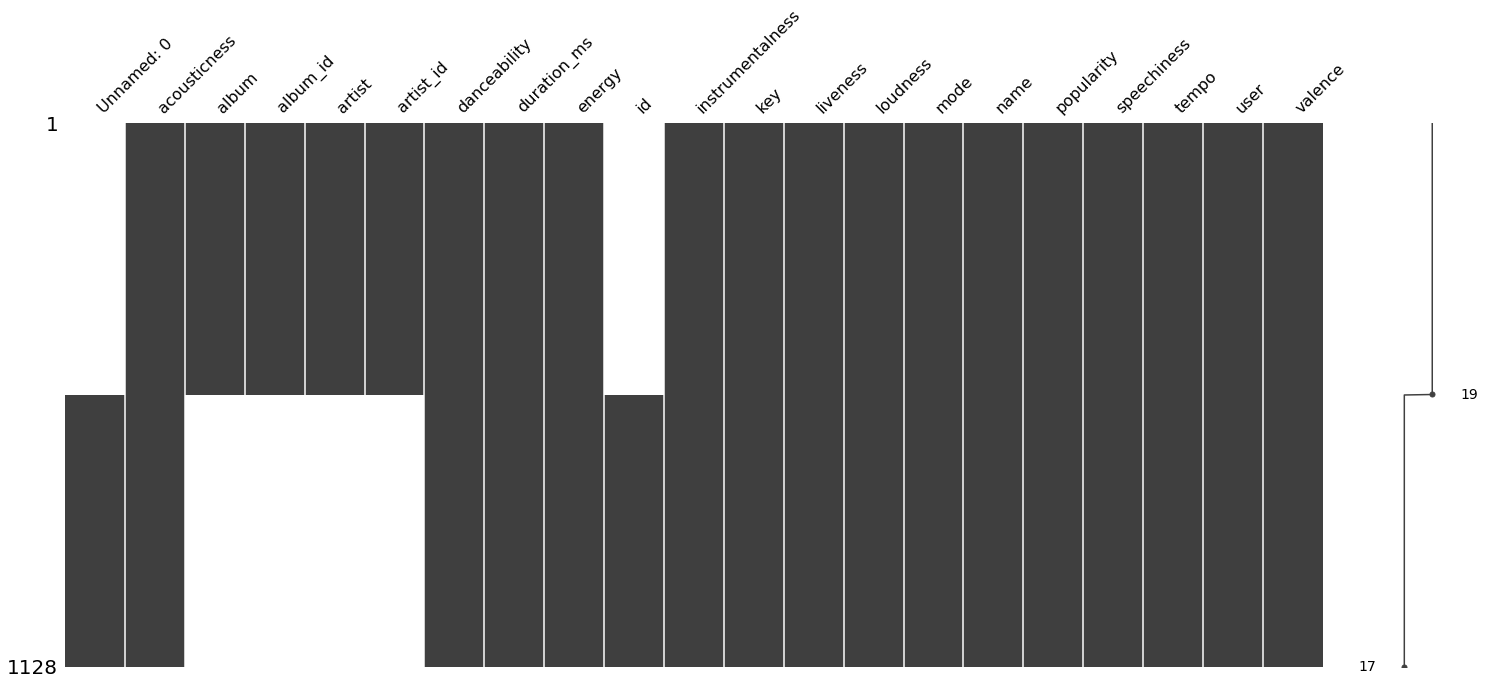

In [10]:
msno.matrix(all_songs)

# Buscando similaridades e diferenças significativas entre os dados

> O objetivo desta análise é encontrar possíveis diferenças entre os dados de ambos os dataframes que podem representar diferenças entre os
> gostos musicais de cada usuário. Tentaremos observar isso graficamente utilizando as bibliotecas do python.

In [20]:
def plot_similarities(data, variables):
    root = int(np.ceil(np.sqrt(len(variables))))
    fig, axis = plt.subplots(nrows=root, ncols=root, figsize=(15, 15))
    
    numeric_categories = ["0.0 - 0.2",
                           "0.2 - 0.4",
                           "0.4 - 0.6",
                           "0.6 - 0.8",
                           "0.8 - 1.0",
                           ]
    fig.suptitle('Comparando distribuições para as características das musicas')
    for idx, column in enumerate(variables):
        i, j = idx % root, idx // root
        ax = axis[j][i]
        
        grouped = data.groupby('user')[[column, 'user']]
        
        for user, group in grouped:
            # pd.qcut(group[column].rank(method='first'), len(numeric_categories), numeric_categories)
            sns.distplot(group[column], ax=ax, label=user)
        ax.legend()
    plt.show()

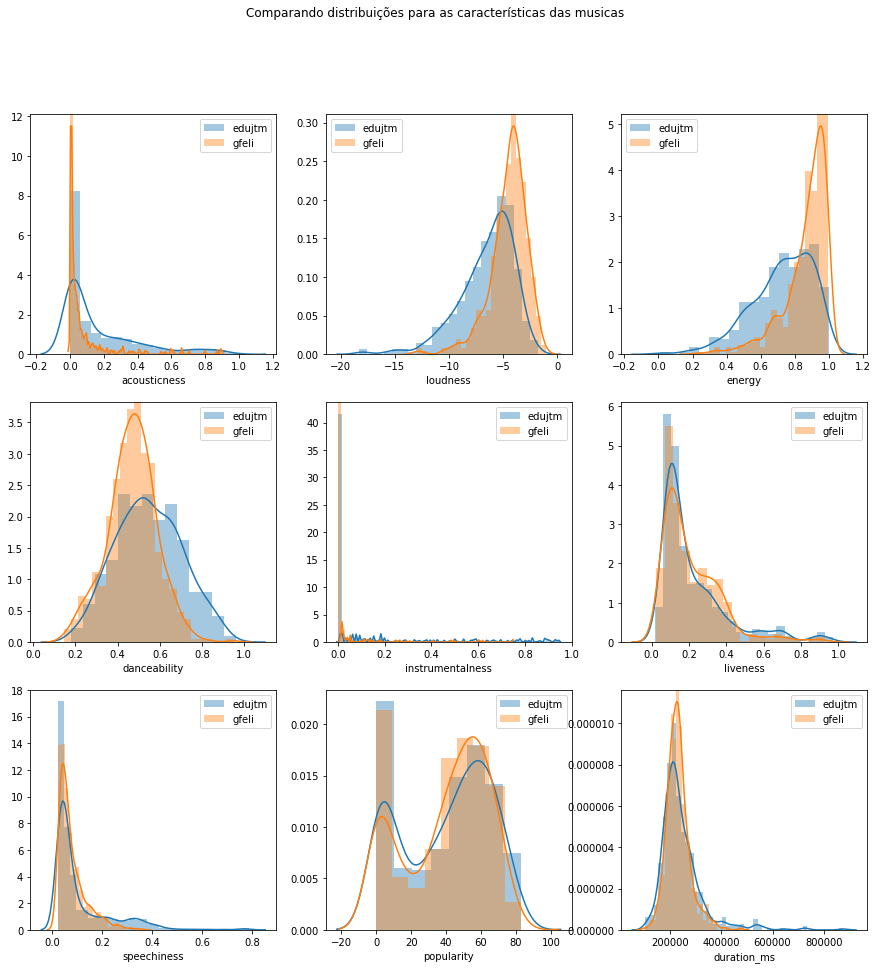

In [22]:
warnings.filterwarnings('ignore')
variables = ['acousticness', 'loudness', 'energy', 'danceability', 'instrumentalness', 'liveness', 'speechiness', 'popularity', 'duration_ms']
plot_similarities(all_songs, variables)

In [16]:
interval = alt.selection_interval()

data = alt.Chart(all_songs).mark_point().encode(
    x='instrumentalness',
    y='loudness',
    tooltip=['name', 'popularity'],
    color=alt.condition(interval, 'user:N', alt.value('lightgray')),
).properties(
    selection=interval
)

popularity = alt.Chart(all_songs).mark_bar(opacity=0.5).encode(
    x=alt.X('popularity', bin=True),
    y='count()',
    color='user'
).transform_filter(
    interval
)

data | popularity

HConcatChart({
  hconcat: [Chart({
    data:                         Unnamed: 0  acousticness  \
    08JTB5hpXPCVPGJzic8E9e         NaN      0.045700   
    7v9Ne4758aGFfFc5avh89h         NaN      0.001250   
    4w9TBRGhvbhiLQB8jVCusl         NaN      0.042600   
    11IJA30efHAJLO3qroPh5L         NaN      0.007430   
    7GvkOFkNsM6Exnkyqeajqm         NaN      0.000029   
    3SRIyREeWrLvZfcv8VlYXE         NaN      0.005790   
    6iJr6l8LNwM5udbBfxpW90         NaN      0.001260   
    1LCH1RDZKSzMfLzNZPpDZk         NaN      0.294000   
    35J3Vo82tou1IcA4xTS4lZ         NaN      0.358000   
    67VGpK85BQ8xTYNAfN9cZc         NaN      0.069600   
    10OAoychwKbKKmizb7rOzf         NaN      0.317000   
    7BsPyswBtiM1PbPnUnuNzE         NaN      0.454000   
    2iDsfMsoqha1JXwewtK5rg         NaN      0.181000   
    0x14txXHlEAZIbHnfTvpAR         NaN      0.131000   
    6FvjAQqC2L0B3TTANybitI         NaN      0.852000   
    6I2y5r09DYjvCwtXtnbZAi         NaN      0.710000   
    4XzacjJ1X1EwBEOD7JYgnR         NaN      0.236000   
    4WAaV7ifIcrHf2SS8jnb6H         NaN      0.142000   
    1MJUvkDWM7bdgah1kT3BsL         NaN      0.217000   
    5cV6XZ4GspMzVFEgRdv5wa         NaN      0.986000   
    3e4IZ4YHeAQghxGxvelkQa         NaN      0.106000   
    53pn1xUK40ZuqqiUGEd2ak         NaN      0.011900   
    6D1Yl6NEp9SSGWKBCFTlZX         NaN      0.680000   
    28RgNB3KlLcjGrWSxLGutK         NaN      0.362000   
    1DeTFlWJxBIuzX6xgAkHsW         NaN      0.465000   
    33wUd3GgaRf2rux2aJ71yb         NaN      0.431000   
    5nF6drlQTtXc5iThQoyONB         NaN      0.198000   
    0Y30sCKxtNQ2MRpl00aA03         NaN      0.889000   
    2Y6yBb2KctOmsxRSS8ZaKY         NaN      0.244000   
    0Gpq0lllEPZf98gVo9C4uS         NaN      0.073300   
    ...                            ...           ...   
    534                         1274.0      0.052500   
    535                         1276.0      0.000144   
    536                         1278.0      0.000470   
    537                         1280.0      0.008800   
    538                         1282.0      0.000181   
    539                         1284.0      0.092700   
    540                         1289.0      0.002990   
    541                         1291.0      0.002660   
    542                         1293.0      0.000091   
    543                         1295.0      0.002310   
    544                         1297.0      0.000439   
    545                         1299.0      0.002760   
    546                         1301.0      0.000448   
    547                         1303.0      0.002620   
    548                         1305.0      0.000221   
    549                         1307.0      0.000237   
    550                         1309.0      0.000369   
    551                         1310.0      0.000254   
    552                         1312.0      0.000950   
    553                         1314.0      0.000097   
    554                         1316.0      0.004030   
    555                         1317.0      0.002400   
    556                         1318.0      0.011800   
    557                         1319.0      0.262000   
    558                         1321.0      0.000127   
    559                         1323.0      0.000488   
    560                         1325.0      0.000495   
    561                         1326.0      0.001600   
    562                         1327.0      0.000006   
    563                         1330.0      0.024100   
    
                                                                        album  \
    08JTB5hpXPCVPGJzic8E9e  Beautiful People Will Ruin Your Life (Extended...   
    7v9Ne4758aGFfFc5avh89h  Proudly Present....A Guide To Love, Loss & Des...   
    4w9TBRGhvbhiLQB8jVCusl               Beautiful People Will Ruin Your Life   
    11IJA30efHAJLO3qroPh5L               Beautiful People Will Ruin Your Life   
    7GvkOFkNsM6Exnkyqeajqm  Proudly Present....A Guide To Love, Loss & Des...